In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import torch

from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

import multiprocessing
from functools import partial
import shutil
import itertools

In [50]:
path = 'data/exp1/'

In [51]:
arch = resnet18

In [52]:
sz = 224

In [53]:
bs = 64

In [54]:
label_csv = f'{path}exp1_labels.csv'

In [55]:
n = len(list(open(label_csv)))-1

In [56]:
n

17055

In [57]:
val_idxs = get_cv_idxs(n)

In [58]:
tfms = tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)

In [59]:
data = ImageClassifierData.from_csv(path,'imgs',label_csv,val_idxs=val_idxs,tfms=tfms,bs=bs)

In [60]:
fn = path+data.trn_ds.fnames[0];fn

'data/exp1/imgs/00000002_000.png'

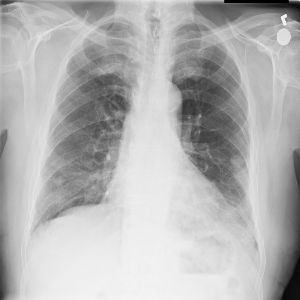

In [61]:
img = PIL.Image.open(fn);img

In [62]:
img.size

(300, 300)

In [63]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

In [64]:
lrf = learn.lr_find()

 86%|████████▋ | 185/214 [00:01<00:00, 93.48it/s, loss=7.86]


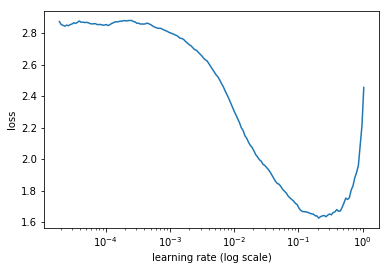

In [65]:
learn.sched.plot()

In [66]:
learn.fit(.5e-1,5)

epoch      trn_loss   val_loss   accuracy                   
    0      1.05632    0.918678   0.780717  
    1      0.971878   0.886791   0.783611                    
    2      0.902833   0.876631   0.783321                    
    3      0.855891   0.871657   0.783321                    
    4      0.838255   0.883157   0.783032                    



[0.8831570474085985, 0.7830317980713315]

In [67]:
learn.precompute = False

In [68]:
lrf = learn.lr_find()

 88%|████████▊ | 189/214 [00:26<00:03,  7.03it/s, loss=4.09] 

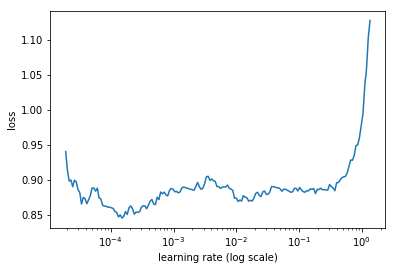

In [69]:
learn.sched.plot()

In [70]:
learn.fit(1e-4,3,cycle_len=1)

  4%|▎         | 8/214 [00:01<00:47,  4.33it/s, loss=0.893] 


Exception in thread Thread-29:
Traceback (most recent call last):
  File "/home/shikhar/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/shikhar/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/shikhar/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.874367   0.888472   0.7839    
    1      0.911606   0.885029   0.7839                      
    2      0.875565   0.883434   0.783321                    



[0.8834340994556745, 0.7833211499231832]

In [71]:
log_preds,y = learn.TTA()

In [72]:
probs = np.exp(log_preds)

In [73]:
probs.shape

(5, 3411, 11)

In [35]:
type(probs)

numpy.ndarray

In [77]:
prob_final  = np.mean(probs,axis=0)

In [78]:
prob_final.shape

(3411, 11)

In [79]:
y

array([1, 7, 7, ..., 7, 7, 7])

In [80]:
prob_final[1]

array([0.07227, 0.23329, 0.00447, 0.00569, 0.00326, 0.01343, 0.03235, 0.58493, 0.03662, 0.01197, 0.00172],
      dtype=float32)

In [83]:
y

array([1, 7, 7, ..., 7, 7, 7])

In [84]:
accuracy_np(prob_final,y)

0.7839343301084726

In [86]:
y.shape

(3411,)

In [87]:
prob_final.shape

(3411, 11)

In [93]:
tmp = np.argmax(prob_final, 1)

In [94]:
tmp

array([7, 7, 7, ..., 7, 7, 7])

In [95]:
(tmp!=7).sum()

7

In [96]:
(tmp==7).sum()

3404

In [92]:
y[1]

7

In [90]:
data.cla

array([0.05133, 0.02742, 0.00598, 0.01512, 0.02149, 0.05285, 0.04585, 0.67513, 0.07747, 0.02492, 0.00245],
      dtype=float32)